### Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#imports
import scipy.io
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import obspy
import pywt
import pywt.data

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

### Load the trimmed data 

In [3]:
path = "/Users/ecem/Desktop/phonocardiogram/data/TV/present"
waves = np.load(path + "/present_TV_waves_10sec.npy", allow_pickle= True)

In [4]:
waves.shape

(1205, 40000)

## Let's look at wavelet decomposition for a signal piece

#### how our decomposition filter values look like

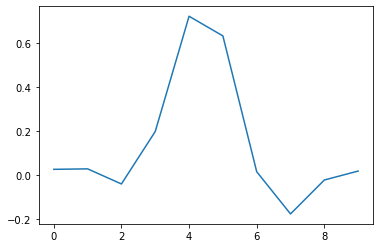

In [5]:
w = pywt.Wavelet('sym5')
plt.plot(w.dec_lo)
coeffs = pywt.wavedec(waves[0], w, level=6)

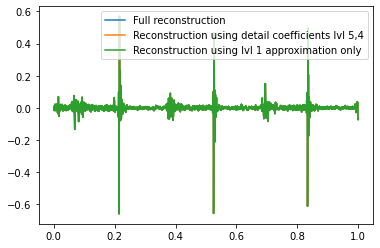

In [6]:
def reconstruction_plot(yyy, **kwargs):
    """Plot signal vector on x [0,1] independently of amount of values it contains."""
    plt.plot(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(pywt.waverec(coeffs, w)) # full reconstruction 
reconstruction_plot(pywt.waverec(coeffs[:-1] + [None] * 1, w)) # leaving out detail coefficients up to lvl 5
reconstruction_plot(pywt.waverec(coeffs[:-2] + [None] * 2, w)) # leaving out detail coefficients up to lvl 4
#reconstruction_plot(pywt.waverec(coeffs[:-3] + [None] * 3, w)) # leaving out detail coefficients up to lvl 3
#reconstruction_plot(pywt.waverec(coeffs[:-4] + [None] * 4, w)) # leaving out detail coefficients up to lvl 2
#reconstruction_plot(pywt.waverec(coeffs[:-5] + [None] * 5, w)) # leaving out detail coefficients up to lvl 1
#reconstruction_plot(pywt.waverec(coeffs[:-6] + [None] * 6, w)) # leaving out all detail coefficients = reconstruction using lvl1 approximation only
plt.legend(['Full reconstruction', 'Reconstruction using detail coefficients lvl 5,4', 'Reconstruction using lvl 1 approximation only'])

Amplitude of the coefficient corresponds to amplitude with which the wavelet occurs in the signal (y axis), and position of the coefficient corresponds to the time (x axis). 

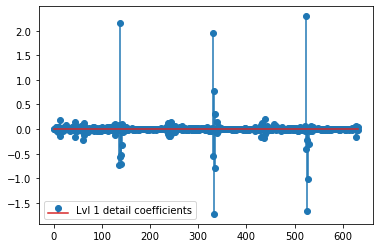

In [7]:
plt.stem(coeffs[1]); plt.legend(['Lvl 1 detail coefficients'])

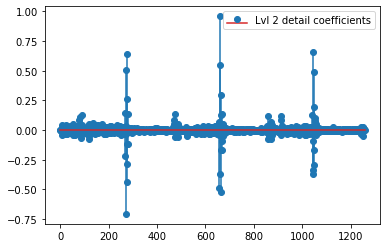

In [8]:
plt.stem(coeffs[2]); plt.legend(['Lvl 2 detail coefficients'])


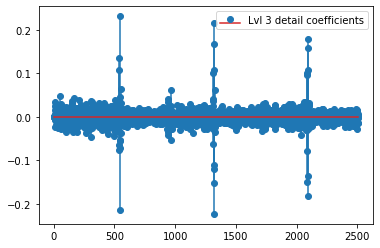

In [9]:
plt.stem(coeffs[3]); plt.legend(['Lvl 3 detail coefficients'])


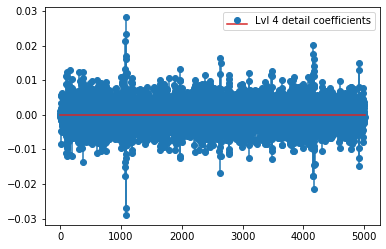

In [10]:
plt.stem(coeffs[4]); plt.legend(['Lvl 4 detail coefficients'])


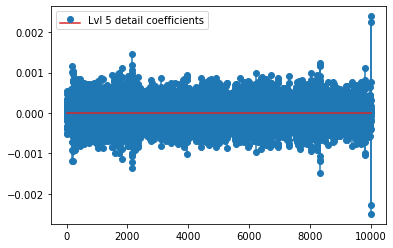

In [11]:
plt.stem(coeffs[5]); plt.legend(['Lvl 5 detail coefficients'])


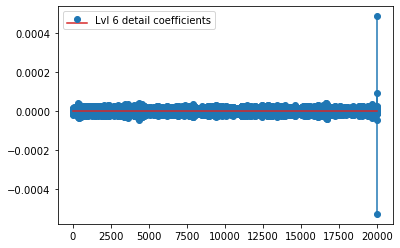

In [12]:
plt.stem(coeffs[6]); plt.legend(['Lvl 6 detail coefficients'])

In [13]:
# Reconstruction of signal using just lvl1 approximation
approx_lvl1 = pywt.waverec(coeffs[:-6] + [None] * 6, w)
# interpolate to original amount of samples (necessary due to numeric solution of transformation not yielding same amount of values)
approx_lvl1_interp = np.interp(x=np.arange(0, len(waves[0])), xp=np.linspace(0, 525, len(approx_lvl1)), fp=approx_lvl1)
x_without_lvl1approx = waves[0] - approx_lvl1_interp

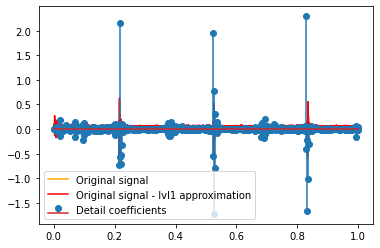

In [14]:
def reconstruction_stem(yyy, **kwargs):
    """Plot coefficient vector on x [0,1] independently of amount of values it contains."""
    plt.stem(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(waves[0], color='orange')
reconstruction_plot(x_without_lvl1approx, color='red')
reconstruction_stem(coeffs[1])
plt.legend(['Original signal', 'Original signal - lvl1 approximation', 'Detail coefficients'])

In [15]:
import pandas as pd

In [16]:
type(pywt.wavedec(waves[0], w, level=6))

list

In [17]:
coef = []
for i in range(len(waves)):
    coef.append(pywt.wavedec(waves[i], w, level=6))

In [18]:
for i in range(7):
    print(coef[0][i].shape)

(633,)
(633,)
(1258,)
(2508,)
(5007,)
(10006,)
(20004,)


In [19]:
coef[0]

[array([-5.61330654e-02, -4.81728166e-02, -4.89401184e-02, -5.11335172e-02,
        -2.34155599e-02,  4.91045751e-02,  1.43804867e-03, -4.17992137e-02,
         4.14388999e-02,  1.66736469e-02, -7.32134432e-02, -1.58031881e-01,
         8.45746249e-02,  2.00893536e-01, -3.31324100e-01, -3.35741192e-02,
         6.61933422e-02, -4.60576452e-02,  4.28763544e-03,  3.11865844e-02,
         6.70501292e-02,  1.06941490e-02, -4.40222807e-02,  2.68362183e-02,
         5.34628294e-02,  9.53123346e-03, -1.54509908e-02, -1.18140248e-03,
         6.97432552e-06, -3.41374427e-02, -3.10306624e-02, -2.53777057e-02,
        -5.96511886e-02, -9.65730939e-03,  3.81226800e-02,  5.16199553e-03,
         4.67466712e-02,  7.38025308e-02,  1.75323691e-02,  6.57730103e-02,
         1.78903401e-01,  1.77129544e-02,  7.52254156e-04,  1.59668207e-01,
         5.28048398e-03,  1.71588376e-01, -8.76293421e-01, -2.57765532e-01,
         3.26843590e-01,  3.12934726e-01,  1.21131353e-02, -2.43297778e-02,
         2.8

In [20]:
coef[1]

[array([-5.65648258e-01, -5.21771252e-01, -5.25592208e-01, -5.40638745e-01,
        -3.73918504e-01,  6.36513457e-02,  6.62834048e-01,  3.54869336e-01,
        -9.20130983e-02,  1.12788472e-02,  6.82869032e-02, -2.18529090e-01,
        -6.40713155e-01,  3.47726531e-02,  3.15744132e-01, -1.21269472e-01,
        -7.46649951e-02,  1.71671480e-01,  1.28540337e-01,  3.31195369e-02,
         5.50733358e-02,  2.53688283e-02,  4.40231599e-02,  2.13574246e-02,
        -7.91835859e-02, -6.33588210e-02,  2.69291885e-02, -4.00982518e-03,
         7.75218457e-02,  4.64662723e-02,  1.14872634e-01,  1.83766335e-02,
         6.89639971e-02,  1.07849203e-02, -2.71595102e-02, -1.38280932e-02,
         6.34422451e-02, -4.03155796e-02, -4.18425864e-03,  3.87031324e-02,
        -6.81096986e-02, -4.60615568e-02, -6.15130272e-03,  4.37581018e-02,
         5.38849123e-02, -2.29345299e-02,  2.07845215e-02,  9.64904146e-04,
         3.19244377e-02, -5.02349287e-02,  7.56718777e-03,  5.90215484e-03,
        -5.5

### Level by level

In [21]:
def level_coef_extractor_3d(array, lvl = 0):
    array =np.array(array)
    
    lenn = array[0][lvl].shape[0] #48
    coef = np.ones(shape = (array.shape[0],lenn)) #2392,48
    
    for i in range(array.shape[0]):
        coef[i,:] = array[i][lvl]
        
    return coef

In [22]:
def saver(array = 0, lvl = 0, dir_path = None, name = 'blank'):
    coefs = level_coef_extractor_3d(array, lvl)
    np.save(dir_path + "/"+ str(name) + "_lvl_"  + str(lvl), coefs, allow_pickle = True)
    del coefs

In [23]:
for i in range(7):
    saver(coef, i, path, 'present_TV_wavelet_coef')


In [24]:
waves_ = np.load(path+ "/present_TV_wavelet_coef_lvl_0.npy",  allow_pickle = True)

In [25]:
waves.shape

(1205, 40000)

In [26]:
waves[0]

array([-0.0060339 , -0.00616685, -0.00637669, ..., -0.07240058,
       -0.0710258 , -0.06941756], dtype=float32)

In [27]:
waves[10]

array([-0.00480179, -0.00428018, -0.00356333, ...,  0.01272542,
        0.01208135,  0.01159259], dtype=float32)